In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics # 모델평가시 이용

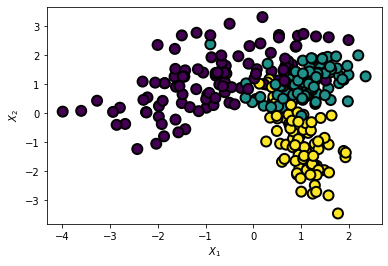

In [2]:
X, y = make_classification(n_samples=300, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=3, 
                           random_state=0)
X=pd.DataFrame(X,columns=['a','b'])
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [3]:
# dataset train/test set 으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# KNN 

## 모델 세우기

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [5]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## 모델평가

In [6]:
y_pred = model.predict(X_test)

In [7]:
# accuracy_score : 모델의 정확도
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8833333333333333

In [8]:
# train / test set 의 confusion matrix
from sklearn.metrics import confusion_matrix

display(
confusion_matrix(y_train, model.predict(X_train)),
confusion_matrix(y_test, model.predict(X_test)))

array([[72,  6,  1],
       [ 3, 75,  1],
       [ 1,  5, 76]], dtype=int64)

array([[17,  3,  0],
       [ 1, 20,  1],
       [ 0,  2, 16]], dtype=int64)

# Naive bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [10]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## 모델평가

In [11]:
y_pred = model.predict(X_test)

In [12]:
# accuracy_score : 모델의 정확도
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8333333333333334

In [13]:
# train / test set 의 confusion matrix
from sklearn.metrics import confusion_matrix

display(
confusion_matrix(y_train, model.predict(X_train)),
confusion_matrix(y_test, model.predict(X_test)))

array([[69, 10,  0],
       [ 5, 72,  2],
       [ 0, 10, 72]], dtype=int64)

array([[16,  4,  0],
       [ 1, 18,  3],
       [ 0,  2, 16]], dtype=int64)

# Decision Tree

<b> [모델 원리] </b>

의사결정나무의 학습 과정은 입력 변수 영역을 두 개로 구분하는 재귀적 분기(recursive partitioning)와 너무 자세하게 구분된 영역을 통합하는 가지치기(pruning) 두 가지 과정으로 나뉩니다. 

재귀적 분기
- 우선 데이터를 한 변수 기준(ex주택 크기)으로 정렬합니다. 이후 가능한 모든 분기점에 대해 엔트로피/지니계수를 구해 분기 전과 비교해 정보획득을 조사합니다. 
- 그리고 다른 변수 기준 으로 정렬한 후 위같은 과정을 반복합니다.
- 모든 경우의 수 가운데 정보획득이 가장 큰 변수와 그 지점을 택해 첫번째 분기를 하게 됩니다. 
- 이후 또 같은 작업을 반복해 두번째, 세번째… 이렇게 분기를 full tree 가 될때까지 계속 해 나갑니다.

가지치기
- 의사결정나무 모델 학습의 또다른 축은 가지치기(pruning)입니다. 모든 terminal node의 순도가 100%인 상태를 Full tree라고 하는데요. 이렇게 Full tree를 생성한 뒤 적절한 수준에서 terminal node를 결합해주어야 합니다. 왜냐하면 분기가 너무 많아서 학습데이터에 과적합(overfitting)할 염려가 생기기 때문입니다.
- 가지치기는 데이터를 버리는 개념이 아니고 분기를 합치는(merge) 개념으로 이해해야 합니다.
- 가지치기의 경우 비용함수(costfunction = Err(T)+α×L(T) (Err(T) : 오분류율 , L(T) : terminal node(leaf)의 수(구조의 복잡도), α : 가중치 상수 보통 0.1~0.01 )  가 최소가 되도록 가지를 치게 됩니다.

<b> [장점] </b>
- 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽습니다(비교적 작은 트리일 때). 
- 그리고 데이터의 스케일에 구애받지 않습니다. 데이터의 변수마다 트리에서는 개별적으로 처리되어 데이터를 분할하는 데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요 없습니다. 특히 특성의 스케일이 서로 다르거나 이진 특성(범주형)과 연속적(연속형)인 특성이 혼합되어 있을 때도 잘 작동합니다.
- 계산복잡성 대비 높은 예측 성능을 내는 것으로 정평이 나 있습니다. 

<b> [단점] </b>
- 결정경계(decision boundary)가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 가능성이 높습니다.
- data 의 변화에 매우 민감합니다. 데이터가 약간만 변화해도 tree 가 완전히 변화하기 떄문입니다.
- 두 변수가 multicollinearity 관계에 있으면 decision tree will greedily choose the best one. 즉 한 변수는 아예 쳐내버립니다. 두 변수를 모두 이용하지 않는다는것입니다.
- sample 범위 바깥의 값을 예측할 때에는 오히려 선형회귀보다 훨씬 안좋은 fitting 이 나옵니다.
- 결정 트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다는 것입니다. 그래서 다음에 설명할 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용합니다.


<b> [Hyperparameter] </b>

criterion 
- 불순성의 기준을 뭐로 할지 'gini' / 'entropy' 가능
- (defalut)= 'gini'

max_depth 
- 트리의 최대 깊이. 
- 이를 이용해 사전 가지치기를 하고/ overfitting 을 해결할 수 있다.
- (defalut) : full tree 가 될때까지 확장.

min_samples_split 
- 노드에서 가지 분리할 떄 필요한 최소 sample 갯수에 제한을 준다.
- (default) = 2 

min_samples_leaf
- leaf 에서 가져야 할 최소 sample 
- (default) = 1

max_features
- Decision tree 를 만들때 사용할 수 있는 변수의 갯수 제한
- (default) = 총 변수 갯수 사용

<b> [Hyperparameter tuning] </b>
-  max_depth 하나만 지정해도 과대적합을 막는 데 충분합니다.

<b>[feature importance]</b>

계산 원리

- 노드 중요도 부터 정의해야합니다. 노드 중요도란 Information Gain을 결국 말합니다. 의사결정나무에서는 그 때 Information Gain을 최대화하는 feature를 기준으로 노드를 째게 됩니다. 어떤 노드의 노드 중요도 값이 크다는 것은 그 노드에서 특히 불순도가 크게 감소한다는 것을 의미합니다.
- i번째 feature의 중요도 : 전체 노드의 중요도를 합한 것 대비 i번째 feature에 의해 째진 노드들의 중요도를 합한 것 입니다.

의미

- 이 값은 0~1 사이의 숫자로, 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다. 특성 중요도의 전체 합은 1입니다.
- Scikit-learn에서는 지니 중요도(Gini Importance)를 이용해서 각 feature의 중요도를 측정합니다
- 그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아닙니다. 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있습니다.
- 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없습니다. 즉 이 변수의 영향력이 긍정적인지 부정적인지 알 수는 없습니다.
- 하지만 feature Importance는 다소 biased하다. 특히, 랜덤 포레스트는 연속형 변수 또는 카테고리 개수가 매우 많은 변수, 즉 ‘high cardinality’ 변수들의 중요도를 더욱 부풀릴 가능성이 높다고 한다. 왜 이런 결과가 나오는지는 정확히 알 수 없으나, cardinality가 큰 변수일 수록, 노드를 쨀 게 훨씬 더 많아서 노드 중요도 값이 높게 나오는 게 아닐까 싶다.

**[Modeling 주의점]**
- 범주형 변수가 X 에 있을 경우, 이 변수를 모두 가변수 처리(one hot) 을 해주어야한다. (범주형 변수를 자기가 알아서 거르지못함..)
- 수치형 변수의 경우 혹시 str 으로 설정되어있는 경우, decision tree 가 해석할 수 없게되므로 주의해서 보자.

## 데이터 살펴보기

In [38]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
# string 이 있는지 검사 
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [25]:
# 곁측치가 있는지 검사
df.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## X data set 만들기

In [56]:
X = df[["pclass", "age", "sex",'fare']].copy()
X.head()

,pclass,age,sex,fare
0,3,22.0,male,7.2500
1,1,38.0,female,71.2833
2,3,26.0,female,7.9250
3,1,35.0,female,53.1000
4,3,35.0,male,8.0500


In [57]:
# Label Encoder 로 범주형 변수를 정수값으로 바꾸기
from sklearn.preprocessing import LabelEncoder
X["sex"] = LabelEncoder().fit_transform(dfX["sex"])
X.head()

,pclass,age,sex,fare
0,3,22.0,1,7.2500
1,1,38.0,0,71.2833
2,3,26.0,0,7.9250
3,1,35.0,0,53.1000
4,3,35.0,1,8.0500


In [58]:
# age 의 곁측치를 평균으로 치환하기
X["age"].fillna(X["age"].mean(), inplace=True)
X.head()

,pclass,age,sex,fare
0,3,22.0,1,7.2500
1,1,38.0,0,71.2833
2,3,26.0,0,7.9250
3,1,35.0,0,53.1000
4,3,35.0,1,8.0500


In [59]:
# 0,1,2 로 표현된 pclass 를 dummy variable 들로 변환
pclass_dummy=pd.get_dummies(dfX['pclass'])
pclass_dummy.columns = ['c1','c2','c3']
X=pd.concat([X,pclass_dummy],axis=1)
X.drop('pclass',axis=1,inplace=True)
X.head()

,age,sex,fare,c1,c2,c3
0,22.0,1,7.2500,0,0,1
1,38.0,0,71.2833,1,0,0
2,26.0,0,7.9250,0,0,1
3,35.0,0,53.1000,1,0,0
4,35.0,1,8.0500,0,0,1


## y data set 만들기

In [61]:
y = df["survived"].copy()

## Train/Test 나누기

In [62]:
# train/ test set 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Model 세우기

In [63]:
#model 만들고, X_train/ Y_train 에 fitting 하기
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
# criterion : 불순성의 기준을 뭐로 할지 'gini'(defalut) / 'entropy'
# 다음의 parameterm 들으 overfitting 을 해결해준다.
# max_depth : 트리의 최대 깊이. 
#           : (defalut) full tree 가 될때까지 확장.
#           : 이를 이용해 사전 가지치기를 하고/ overfitting 을 해결할 수 있다.
# min_samples_split : 노드에서 가지 분리할 떄 필요한 최소 sample 갯수에 제한을 준다.
#                   : (default) = 2 
# min_samples_leaf : leaf 에서 가져야 할 최소 sample 
#                  : (default) = 1
# max_features : Decision tree 를 만들때 사용할 수 있는 변수의 갯수 제한
#              : (default) = 총 변수 갯수 사용

## CV model

In [66]:
#model fitting 할 때에 train/validation 를 나누지 않고 바로 k-fold 로 해버리는 방법도 있다.
#이 방법은 k-fold 여서, 시각화하기가 어렵다.(각각 sample 마다 트리가 다를것 이므로)

#k=fold 방법
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
cross_val_score(model1, X, y, scoring="accuracy", cv=cv).mean()

0.8080848659845584

In [67]:
#confusion matrix
from sklearn.metrics import confusion_matrix

display(
confusion_matrix(y_train, model.predict(X_train)),
confusion_matrix(y_test, model.predict(X_test)))

array([[372,  38],
       [ 76, 182]], dtype=int64)

array([[120,  19],
       [ 24,  60]], dtype=int64)

In [68]:
# 총체적인 성적표
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       410
           1       0.83      0.71      0.76       258

    accuracy                           0.83       668
   macro avg       0.83      0.81      0.81       668
weighted avg       0.83      0.83      0.83       668



In [71]:
#decision tree 의 시각화. 어떻게 분류햇는가?
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

#X 의 feature name 저장하기 (시각화를 위함)
feature_names = X.columns 

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

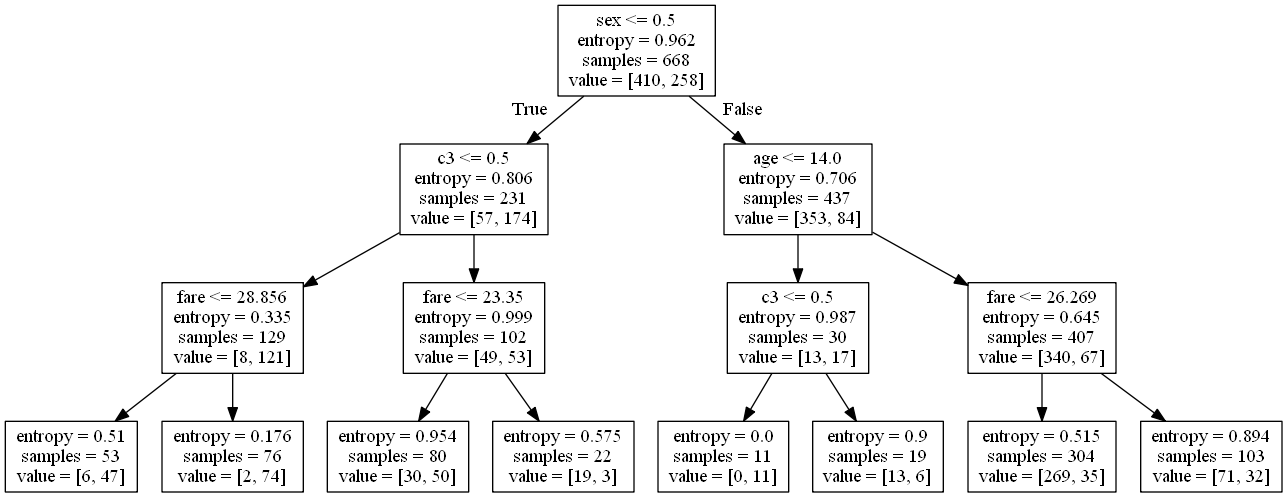

In [72]:
draw_decision_tree(model)

## 예측 및 해석

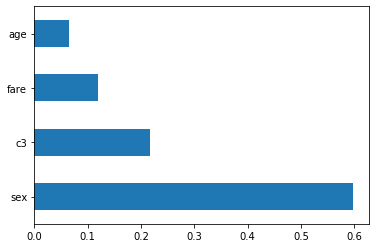

In [74]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')

생존에 제일 중요했던 변수는 성별이였다<br>
그리고 c3(pclass 가 최상급인가 아닌가) 의 여부도 꽤 중요한 영향을 끼친듯 하다.

In [78]:
#X = ['age', 'sex','fare' 'c1', 'c2', 'c3'] 임을 상기하자.
#Y = [die,survive]

model.predict_proba([[8,0,90,1,0,0]]) 
# 8살 여자 승객클래스가 고급 이면 살 확률이 95%나 된다. 

array([[0.02631579, 0.97368421]])

# Voting 

**모델 원리**
- 많은 분류기들에 대해서 각 분류기들의 예측 값들을 모아서 종합해 예측하는 방법

**모델 장점**

- 다수결 투표(voting) 분류기는 앙상블에 포함된 개별 분류기중 제일 뛰어난 것 보다 더 좋을때가 많다!
- 각 모델의 예측을 종합해서 편향을 제거해준다: 치우침이 있는 여러 모형의 평균을 취하면, 어느 쪽에도 치우치지 않는 결과(평균)를 얻게 된다.
- 분산을 감소시킨다: 한 개 모형으로부터의 단일 의견보다 여러 모형의 의견을 결합하면 변동이 작아진다.
- 과적합의 가능성을 줄여준다: 과적합이 없는 각 모형으로부터 예측을 결합(평균, 가중 평균, 로지스틱회귀)하면 과적합의 여지가 줄어든다

**Hyperparameter**
- voting : 투표 방식
    - 'hard' : 많은 분류기를 훈련시켰다고 하자. (model1, model2 .... ) 더 좋은 분류기를 만드는 방법은 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는것이다. 이를 hard voting 분류기라고 한다.
    - 'soft' : 모든 분류기가 클래스의 확률을 예측할 수 있으면 (즉 predict_proba() 메서드가 있으면) 개별 분류기의 예측을 평균애어서 확률이 가장 높은 클래스를 예측할 수 있다. 이를 soft voting 라고 한다. 확률이 높은 투표에 비중을 더 두기 떄문에 일반적으로는 직접 투표(hard voting) 보다 성능이 더 높다. 
- estimators : 어떤 모형들을 결합할지
    - list of (str, estimator) tuples 을 받는다. 

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## hard voting

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('logit', log_clf), ('random_forest', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [88]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logit',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('random_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_we...
                                        

In [89]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


## soft voting

In [90]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [91]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Bagging

**[모델 원리]**

- 주어진 train set 을 표본공간처럼 이용해, sampling 을 여러번 반복해서 많은 data set 들을 만든다.
- 각 sample 에서 model 을 훈련시킨다.
- 모든 model 의 예측을 모아서 새로운 샘플에 대한 예측을 만든다.
- 일반적으로 classification 이면 최빈값으로 예측하고 / regression 이면 평균을 계산한다.

**[모델 장점]**
- 개별 예측치는 약간씩 편향되어있지만 다양한 데이터들을 결합함으로서 편향과 분산이 모두 줄어든다.
- 원본 데이터셋으로 하나의 예측기를 훈련시킬떄와 비교해 편향(bias) 는 비슷하지만 variance 가 줄어든다!

**[Hyperparameter]**
- base_estimator: 기본 모형
- n_estimators: 모형 갯수. 디폴트 10
- bootstrap: 데이터의 중복 사용 여부. 디폴트 True (즉 복원추출)
- max_samples: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0
- bootstrap_features: 특징 차원의 중복 사용 여부. 디폴트 False
- max_features: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0


**[모델링 종류]**
- 같은 데이터 샘플을 중복사용(replacement)하지 않으면: Pasting
- 같은 데이터 샘플을 중복사용(replacement)하면 Bagging
- 데이터가 아니라 다차원 독립 변수 중 일부 차원을 선택하는 경우에는: Random Subspaces
- 데이터 샘플과 독립 변수 차원 모두 일부만 랜덤하게 사용하면: Random Patches


**[모델링 주의점]**
- Bagging classfifier 은 기반이 되는 분류기가 확률을 추정할 수 있으면 hardvoting 보다는 soft voting 을 이용합니다.
- Bagging 은 기본적으로 복원추출을 하게 되는데, 이는 중복적으로 한 원소가 뽑히게되면 비둘기집의 원리로 뽑히지 않는 sample 도 있다는 의미이다. 수학적으로 각각 뽑힌 샘플은 원래 샘플의 63% 정도만 가진다고 한다. 선택되지 않은 나머지 37% 를 oob(out of bag) 샘플이라고 부른다. 
- 각 예측 model 들이 훈련되는 동안에는 oob 샘플을 사용하지 않으므로 검증세트를 사용하지 않고, oob 샘플을 사용해서 평가할 수 있다 !
- 앙상블의 평가는 각 예측기의 oob 평가를 평균하여 얻게된다. 자세한 모델링은 아래를 더 살펴보자

**[Random Foreset]**
- 랜덤포레트는 bagging 을 적용한 decision tree 의 앙상블이다.

## 데이터 생성

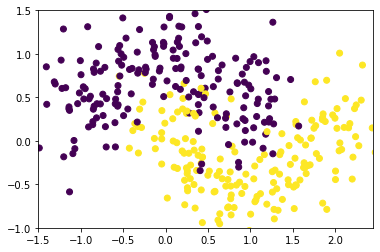

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
# 각 색깔이 y 다른 y 의 label 을 나타낸다. 
plt.axis([-1.5, 2.45, -1, 1.5]);

## 단일 model

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Single tree
model_single = DecisionTreeClassifier(random_state=42)
model_single.fit(X_train, y_train)
y_pred_tree = model_single.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


## bagging 을 한 model

In [94]:
from sklearn.ensemble import BaggingClassifier
# Many trees (bagging)
model_bag = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=0.2, bootstrap=True, oob_score=True, random_state=42)
# BaggingClassifier
# 맨 앞 : 내가 넣을 model
# n_estimators : 모형의 갯수 The number of base estimators in the ensemble
#              : (default) 10
# max_samples : 몇개의(비율의) sample 을 이용해 각 모형들을 구축할 것인가
#             : (default) 1(즉 원 data 의 수와 똑같이 뽑겟다!)
# bootstrap : sample 이 복원추출 되었는지
#           : (default) True
# obb_score : out-of-bag samples 을 generalization error 를 계산하는것에 사용할것인지
#           : (default) False


model_bag.fit(X_train, y_train)
y_pred = model_bag.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.928


bagging 을 한 데이터의 accuracy score 가 더 좋은것을 알 수 있다.

## oob 평가

- 사이킷런에서 Bagging classifier 를 만들떄 oob_score = True 로 지정하면 훈련이 끝난 후 자동으로 oob 평가를 시작한다
- 각 예측 model 들이 훈련되는 동안에는 oob 샘플을 사용하지 않으므로 검증세트를 사용하지 않고, oob 샘플을 사용해서 평가할 수 있다 !
- 앙상블의 평가 점수 결과는 각 예측기의 oob 평가를 평균하여 얻게된다.
- 평가 점수 결과는 oob_score 변수에 저장되어있따.

In [95]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_ # oob 결과에 대한 평균

0.9013333333333333

In [98]:
bag_clf.oob_decision_function_ 
# oob 샘플에 대한 결정함수의 값(각 클래스에 대한 확률 예측) 을 보여준다.

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

In [100]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)
# 이를 보면 0.912로 test 와 obb 샘플을 이용한 평가결과가 아주 비슷함을 볼 수 있다.

0.912